In [1]:
#  Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Load the File

In [3]:
df = pd.read_csv("Loan.csv")

In [4]:
# To display the first 5 rows of the dataset
df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [5]:
# To display the last 5 rows of the dataset
df.tail()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0
19999,2072-10-03,20,53227,574,Employed,Associate,0,32055,48,Married,...,4435.583333,0.853801,5,41372,0.240055,0.242693,1049.830407,0.298006,0,59.0


In [6]:
# To display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [7]:
# To show the number of rows and columns in the dataset (no of rows, no of columns)
df.shape

(20000, 36)

In [8]:
# To display the summary statistics of numerical columns in the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,20000.0,39.752600,11.622713,18.000000,32.000000,40.000000,48.000000,8.000000e+01
AnnualIncome,20000.0,59161.473550,40350.845168,15000.000000,31679.000000,48566.000000,74391.000000,4.853410e+05
CreditScore,20000.0,571.612400,50.997358,343.000000,540.000000,578.000000,609.000000,7.120000e+02
Experience,20000.0,17.522750,11.316836,0.000000,9.000000,17.000000,25.000000,6.100000e+01
LoanAmount,20000.0,24882.867800,13427.421217,3674.000000,15575.000000,21914.500000,30835.000000,1.847320e+05
LoanDuration,20000.0,54.057000,24.664857,12.000000,36.000000,48.000000,72.000000,1.200000e+02
NumberOfDependents,20000.0,1.517300,1.386325,0.000000,0.000000,1.000000,2.000000,5.000000e+00
MonthlyDebtPayments,20000.0,454.292700,240.507609,50.000000,286.000000,402.000000,564.000000,2.919000e+03
CreditCardUtilizationRate,20000.0,0.286381,0.159793,0.000974,0.160794,0.266673,0.390634,9.173801e-01
NumberOfOpenCreditLines,20000.0,3.023350,1.736161,0.000000,2.000000,3.000000,4.000000,1.300000e+01


In [9]:
# To display summary statistics of categorical columns
df.describe(include="object")

,ApplicationDate,EmploymentStatus,EducationLevel,MaritalStatus,HomeOwnershipStatus,LoanPurpose
count,20000,20000,20000,20000,20000,20000
unique,20000,3,5,4,4,5
top,2018-01-01,Employed,Bachelor,Married,Mortgage,Home
freq,1,17036,6054,10041,7939,5925


In [10]:
# Dropping irrelevant columns
del df['ApplicationDate']

### Update!
So we decided to do something different, we want to broaden our reach in financial risk assessment. We don't want to only assess financial risk in loans, but also credit score risk. So we will be carrying out our analysis on both loan risk and credit score risk.


# Checking for Missing Values

In [13]:
df.isna().sum()

Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
InterestRate                  0
MonthlyL

There are no missing values

# Checking For Outliers

In [16]:
# Checking the Summary statistics of the dataset 
df.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


In [17]:
# Creating a variable name for categorical and numerical columns
cat_col = df.select_dtypes(['object', 'category']).columns
num_col = df.select_dtypes(['int64', 'float64']).columns

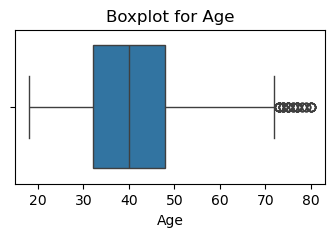

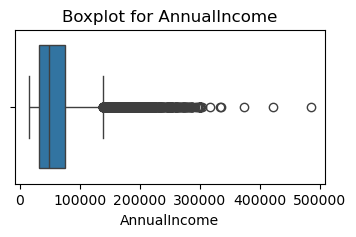

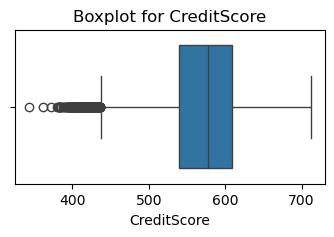

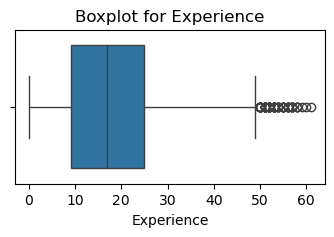

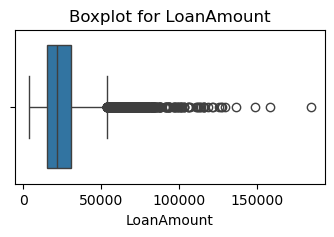

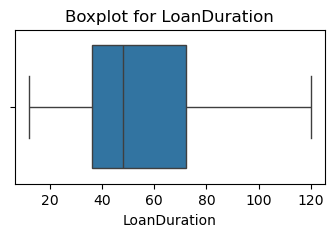

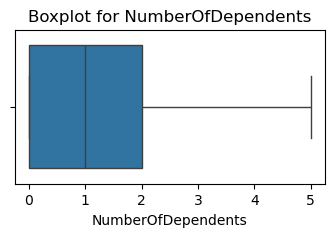

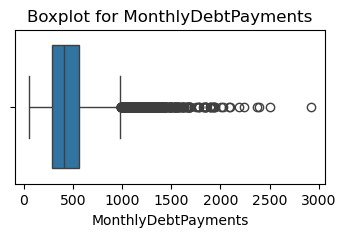

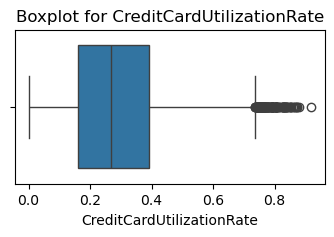

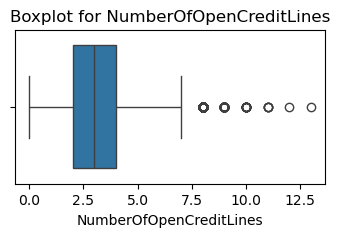

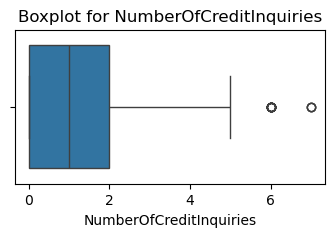

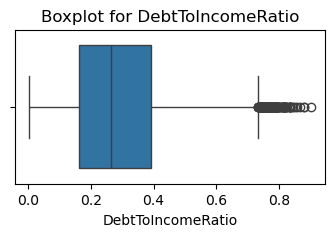

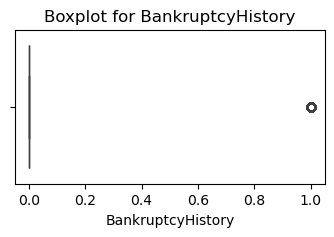

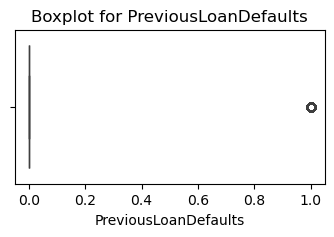

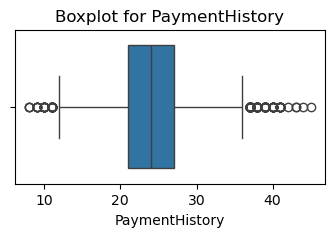

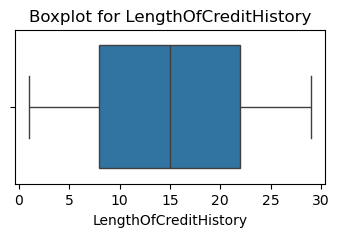

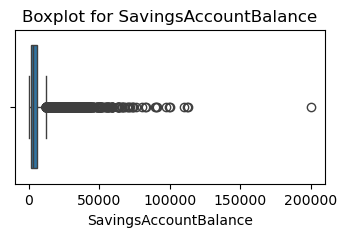

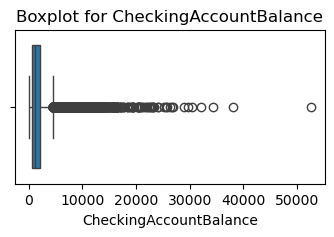

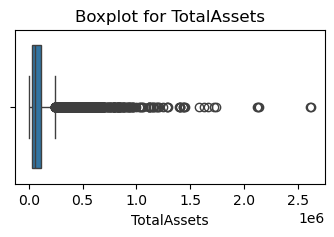

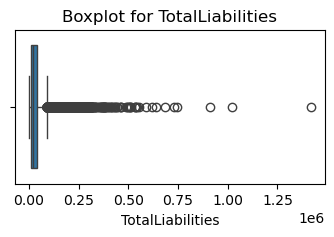

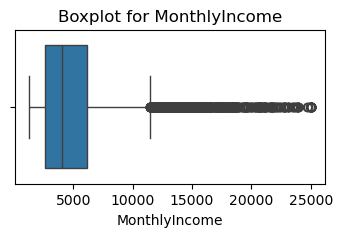

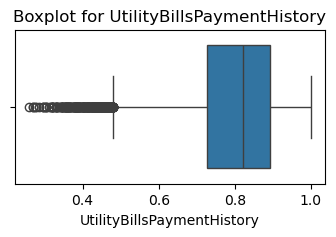

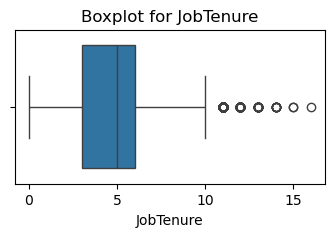

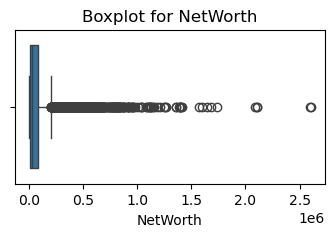

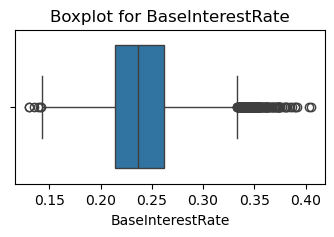

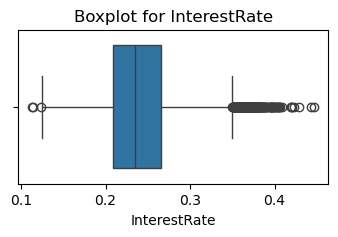

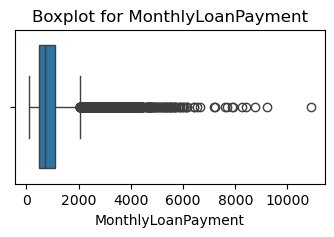

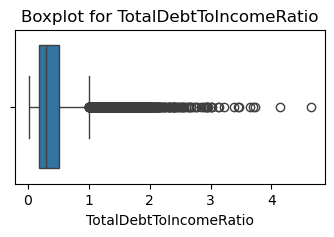

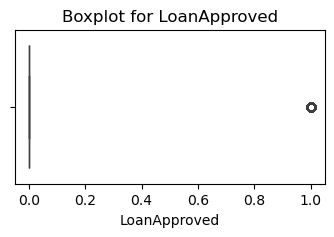

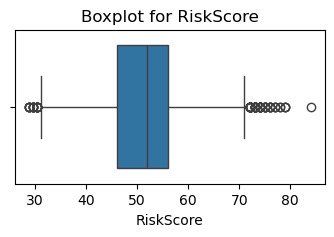

In [18]:
for col in df[num_col]:
    plt.figure(figsize= (4, 2))
    sns.boxplot(x= df[col])
    plt.title(f"Boxplot for {col}")
    plt.grid(False)
    plt.show()

In [19]:
# Handling Outliers by capping values within the IQR bounds
exclude_columns = ['Age', 'CreditScore', 'LoanAmount', 'BankruptcyHistory', 'LoanApproved', 'RiskScore', 'PreviousLoanDefaults']
columns_to_check = df.select_dtypes(['int64', 'float64']).columns.difference(exclude_columns)
for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

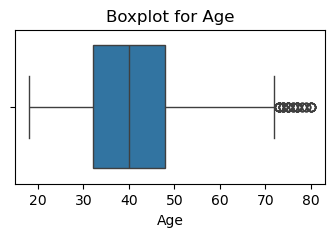

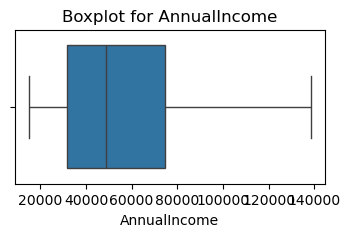

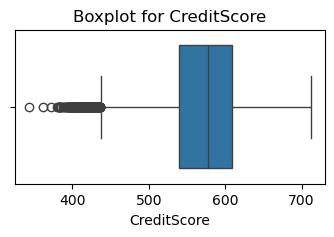

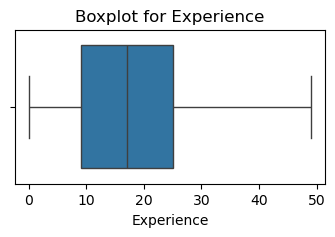

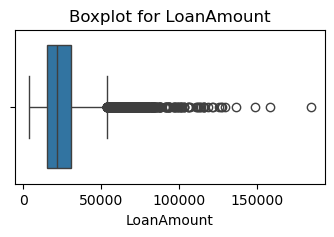

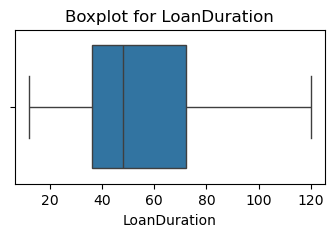

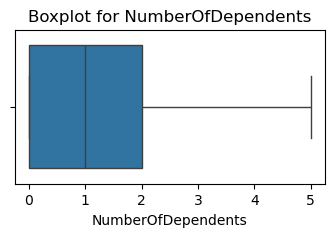

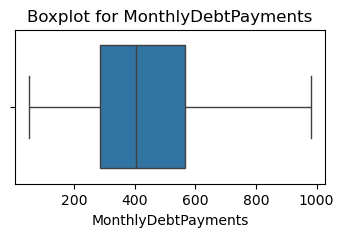

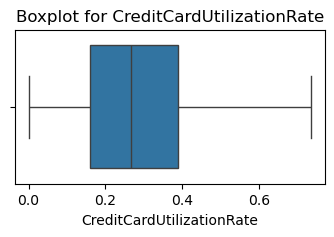

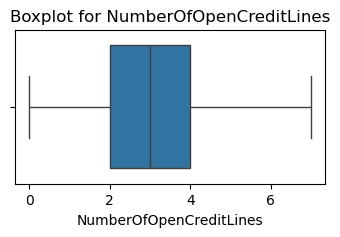

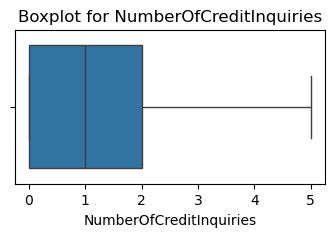

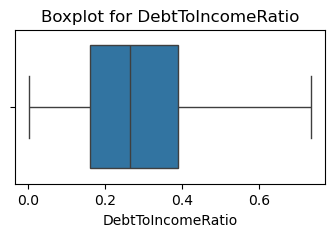

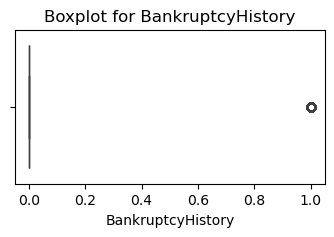

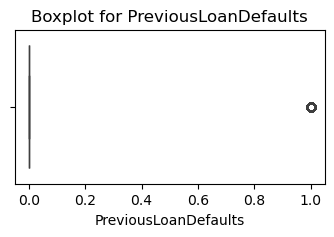

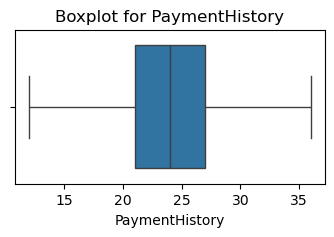

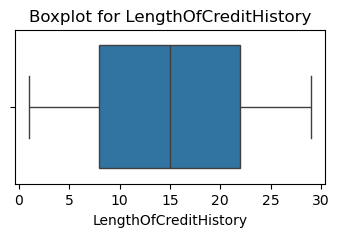

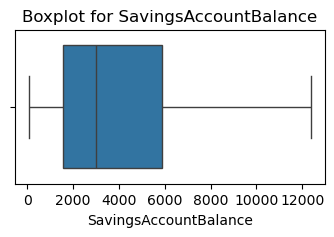

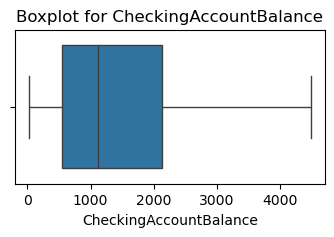

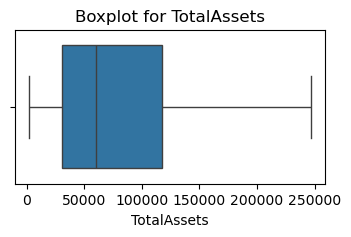

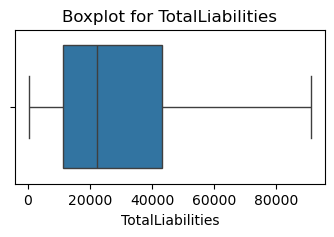

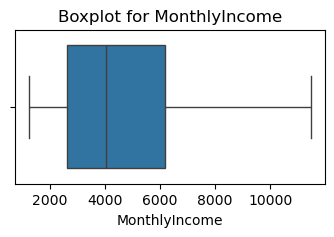

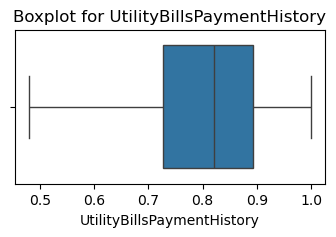

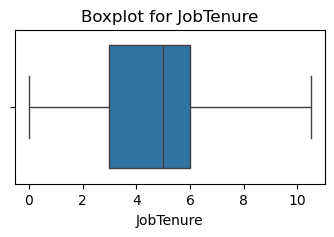

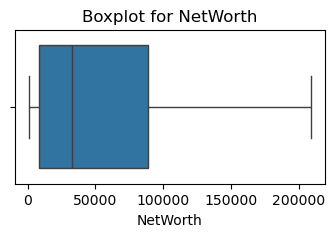

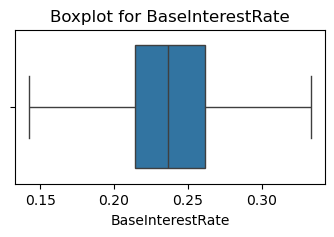

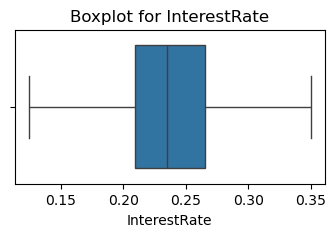

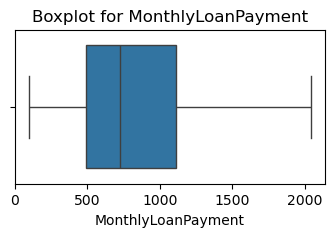

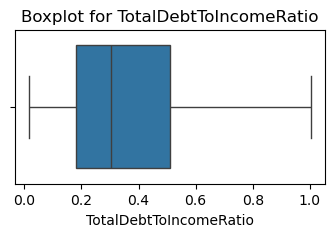

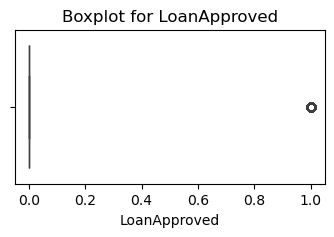

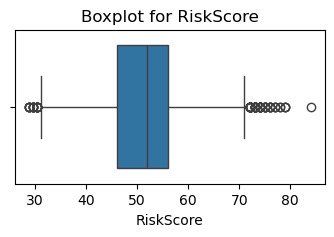

In [20]:
for col in df[num_col]:
    plt.figure(figsize= (4, 2))
    sns.boxplot(x= df[col])
    plt.title(f"Boxplot for {col}")
    plt.grid(False)
    plt.show()

# Encoding Categorical Columns

In [22]:
df.head()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,45,39948.0,617,Employed,Master,22.0,13152,48,Married,2,...,3329.000000,0.724972,10.5,126928.000,0.199652,0.227590,419.805992,0.181077,0,49.0
1,38,39709.0,628,Employed,Associate,15.0,26045,48,Single,1,...,3309.083333,0.935132,3.0,43609.000,0.207045,0.201077,794.054238,0.389852,0,52.0
2,47,40724.0,570,Employed,Bachelor,26.0,17627,36,Married,2,...,3393.666667,0.872241,6.0,5205.000,0.217627,0.212548,666.406688,0.462157,0,52.0
3,58,69084.0,545,Employed,High School,34.0,37898,96,Single,1,...,5757.000000,0.896155,5.0,99452.000,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,37,103264.0,594,Employed,Associate,17.0,9184,36,Married,1,...,8605.333333,0.941369,5.0,208961.625,0.197184,0.175990,330.179140,0.070210,1,36.0


In [23]:
# Checking unique variables in categorical columns
for col in df[cat_col]:
    print(col)
    print(f"{df[col].unique()}")

EmploymentStatus
['Employed' 'Self-Employed' 'Unemployed']
EducationLevel
['Master' 'Associate' 'Bachelor' 'High School' 'Doctorate']
MaritalStatus
['Married' 'Single' 'Divorced' 'Widowed']
HomeOwnershipStatus
['Own' 'Mortgage' 'Rent' 'Other']
LoanPurpose
['Home' 'Debt Consolidation' 'Education' 'Other' 'Auto']


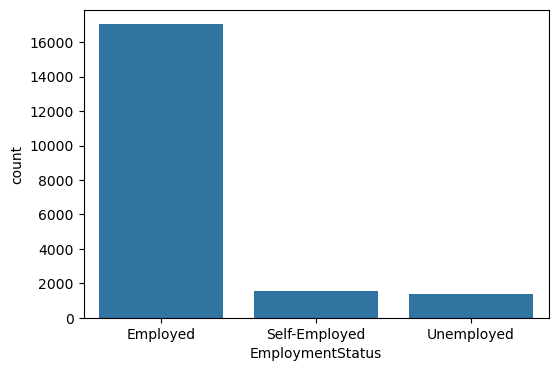

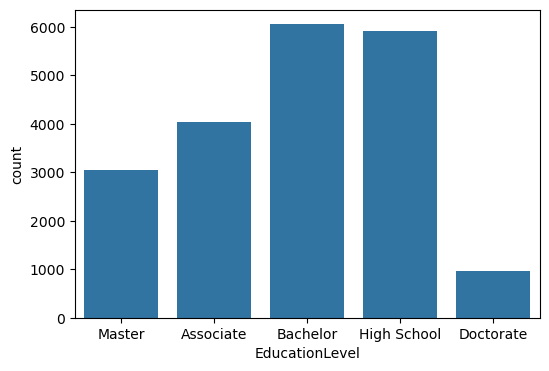

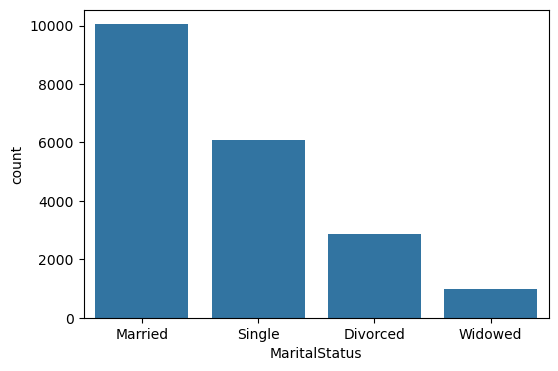

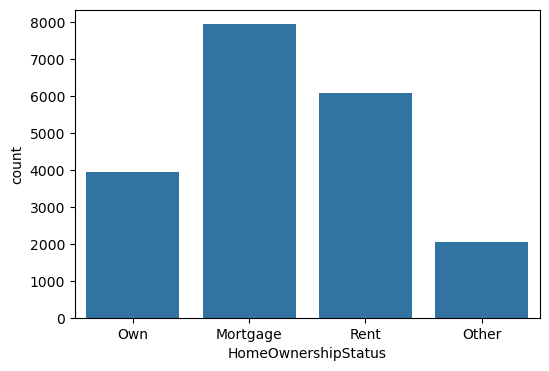

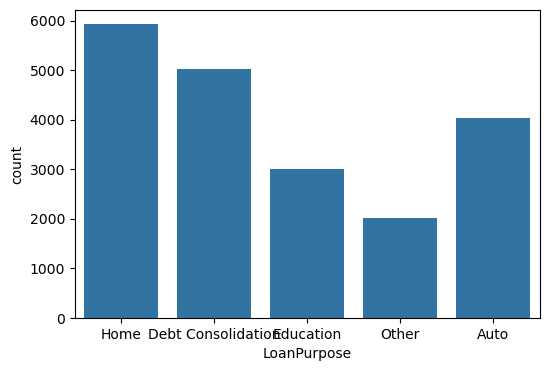

In [24]:
# Plotting a Countplot to visualize all the Categorical Columns
for i, col in enumerate(cat_col):
    plt.figure(figsize = (6, 4))  # forces a new figure
    # Create a count plot for categorical columns
    sns.countplot(data=df, x=col)

In [25]:
# Using OrdinalEncoder
order = [['Employed', 'Self-Employed', 'Unemployed']]
ord_en1 = OrdinalEncoder(categories= order)
df['EmploymentStatus'] = ord_en1.fit_transform(df[['EmploymentStatus']])

order = [['High School', 'Associate', 'Bachelor', 'Master', 'Doctorate']]
ord_en2 = OrdinalEncoder(categories= order)
df['EducationLevel'] = ord_en2.fit_transform(df[['EducationLevel']])

order = [['Single', 'Married', 'Divorced', 'Widowed']]
ord_en3 = OrdinalEncoder(categories= order)
df['MaritalStatus'] = ord_en3.fit_transform(df[['MaritalStatus']])

order = [['Own', 'Mortgage', 'Rent', 'Other']]
ord_en4 = OrdinalEncoder(categories= order)
df['HomeOwnershipStatus'] = ord_en4.fit_transform(df[['HomeOwnershipStatus']])

order = [['Home', 'Debt Consolidation', 'Education', 'Auto', 'Other']]
ord_en5 = OrdinalEncoder(categories= order)
df['LoanPurpose'] = ord_en5.fit_transform(df[['LoanPurpose']])

In [26]:
df.head()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,45,39948.0,617,0.0,3.0,22.0,13152,48,1.0,2,...,3329.000000,0.724972,10.5,126928.000,0.199652,0.227590,419.805992,0.181077,0,49.0
1,38,39709.0,628,0.0,1.0,15.0,26045,48,0.0,1,...,3309.083333,0.935132,3.0,43609.000,0.207045,0.201077,794.054238,0.389852,0,52.0
2,47,40724.0,570,0.0,2.0,26.0,17627,36,1.0,2,...,3393.666667,0.872241,6.0,5205.000,0.217627,0.212548,666.406688,0.462157,0,52.0
3,58,69084.0,545,0.0,0.0,34.0,37898,96,0.0,1,...,5757.000000,0.896155,5.0,99452.000,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,37,103264.0,594,0.0,1.0,17.0,9184,36,1.0,1,...,8605.333333,0.941369,5.0,208961.625,0.197184,0.175990,330.179140,0.070210,1,36.0


# Correlation

<Axes: >

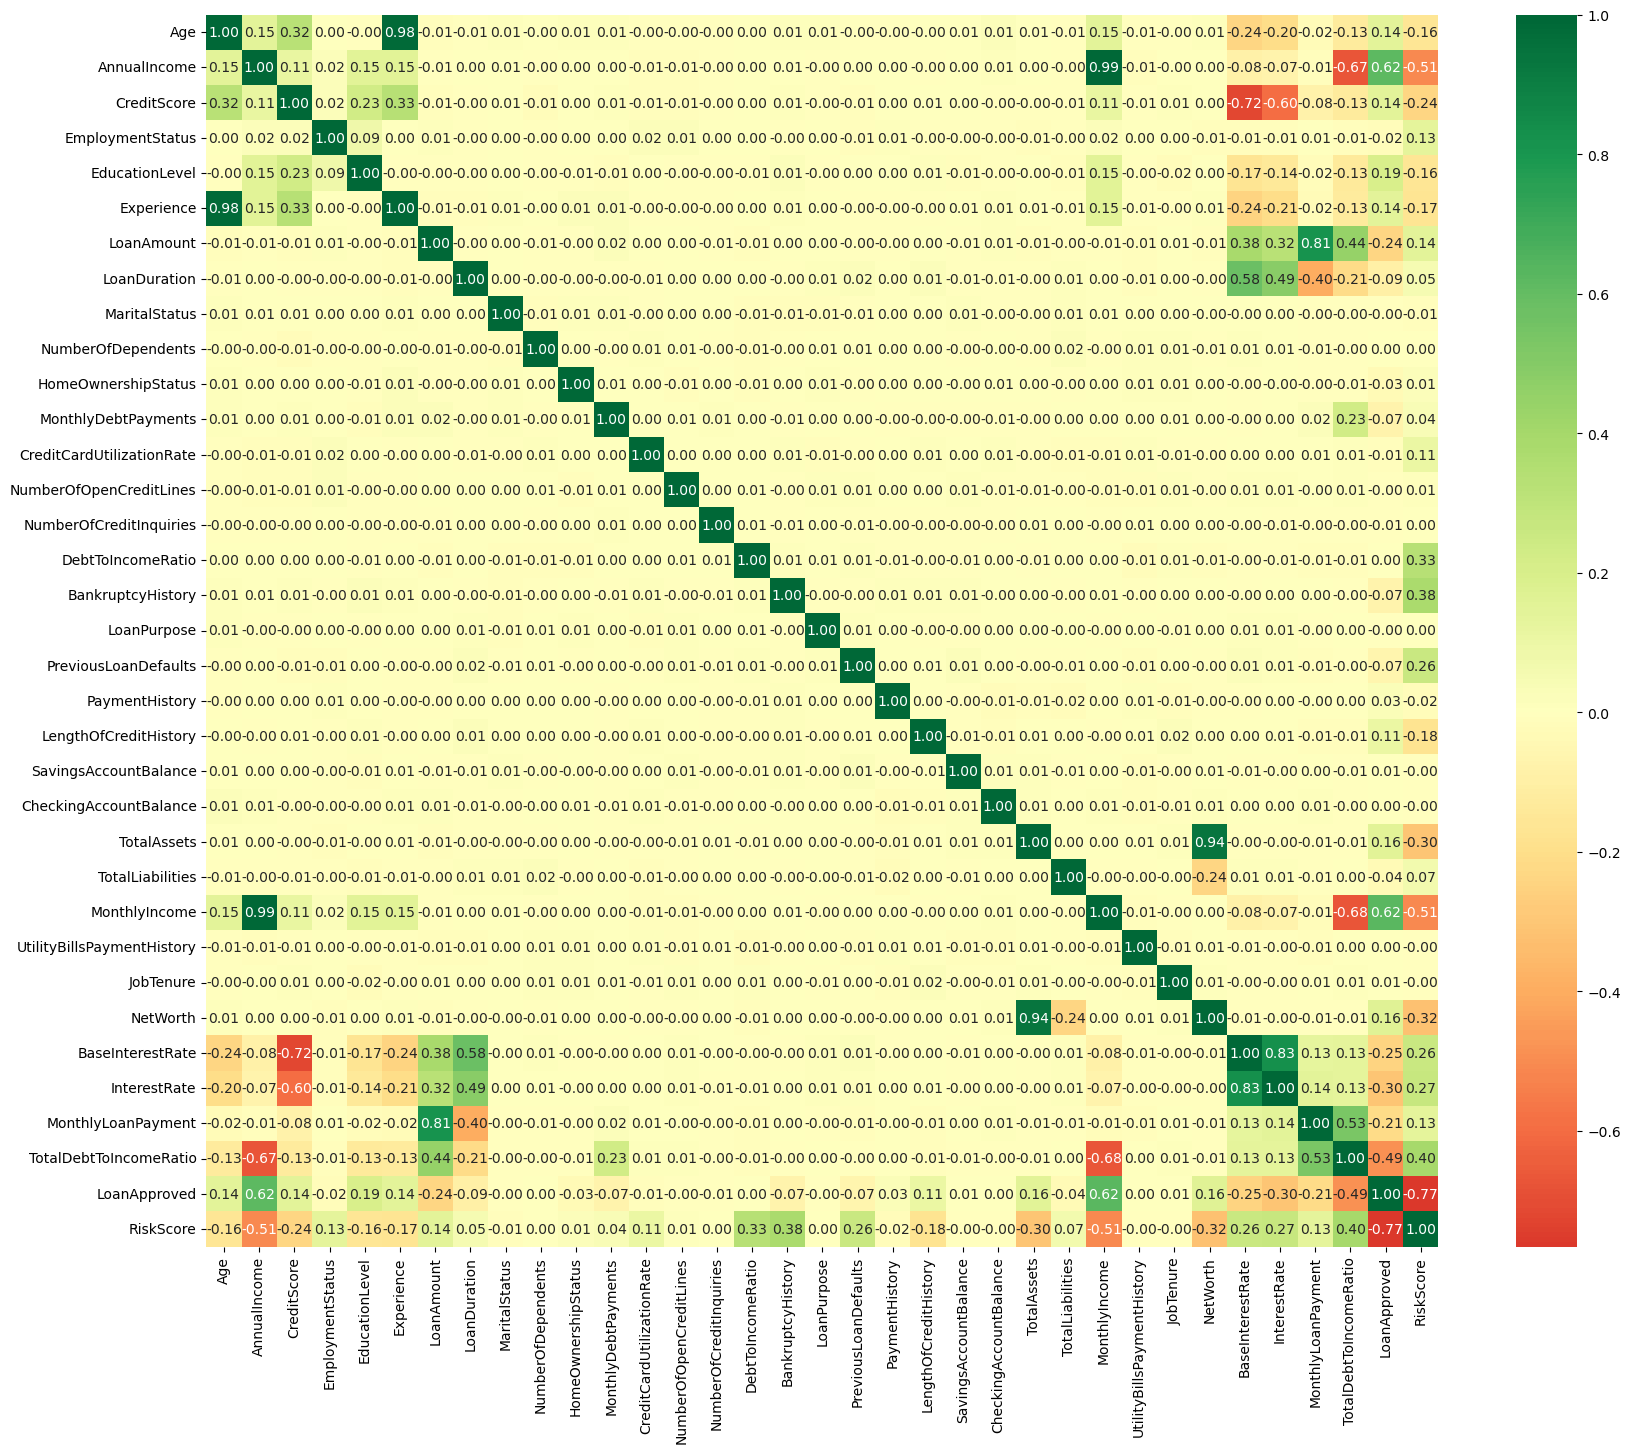

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 16))
# Plot the correlation matrix as a heatmap
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', center=0, square=True, fmt = ".2f")

From our observation, we can see that features BaseInterestRate and InterestRate are multicollinear.

Also, we can see that features LoanApproved and Risk Score are multicollinear.

We'll resolve this by dropping BaseInterestRate and Risk Score feature 

In [30]:
del df['BaseInterestRate']
del df['RiskScore']
del df['MonthlyIncome']

<Axes: >

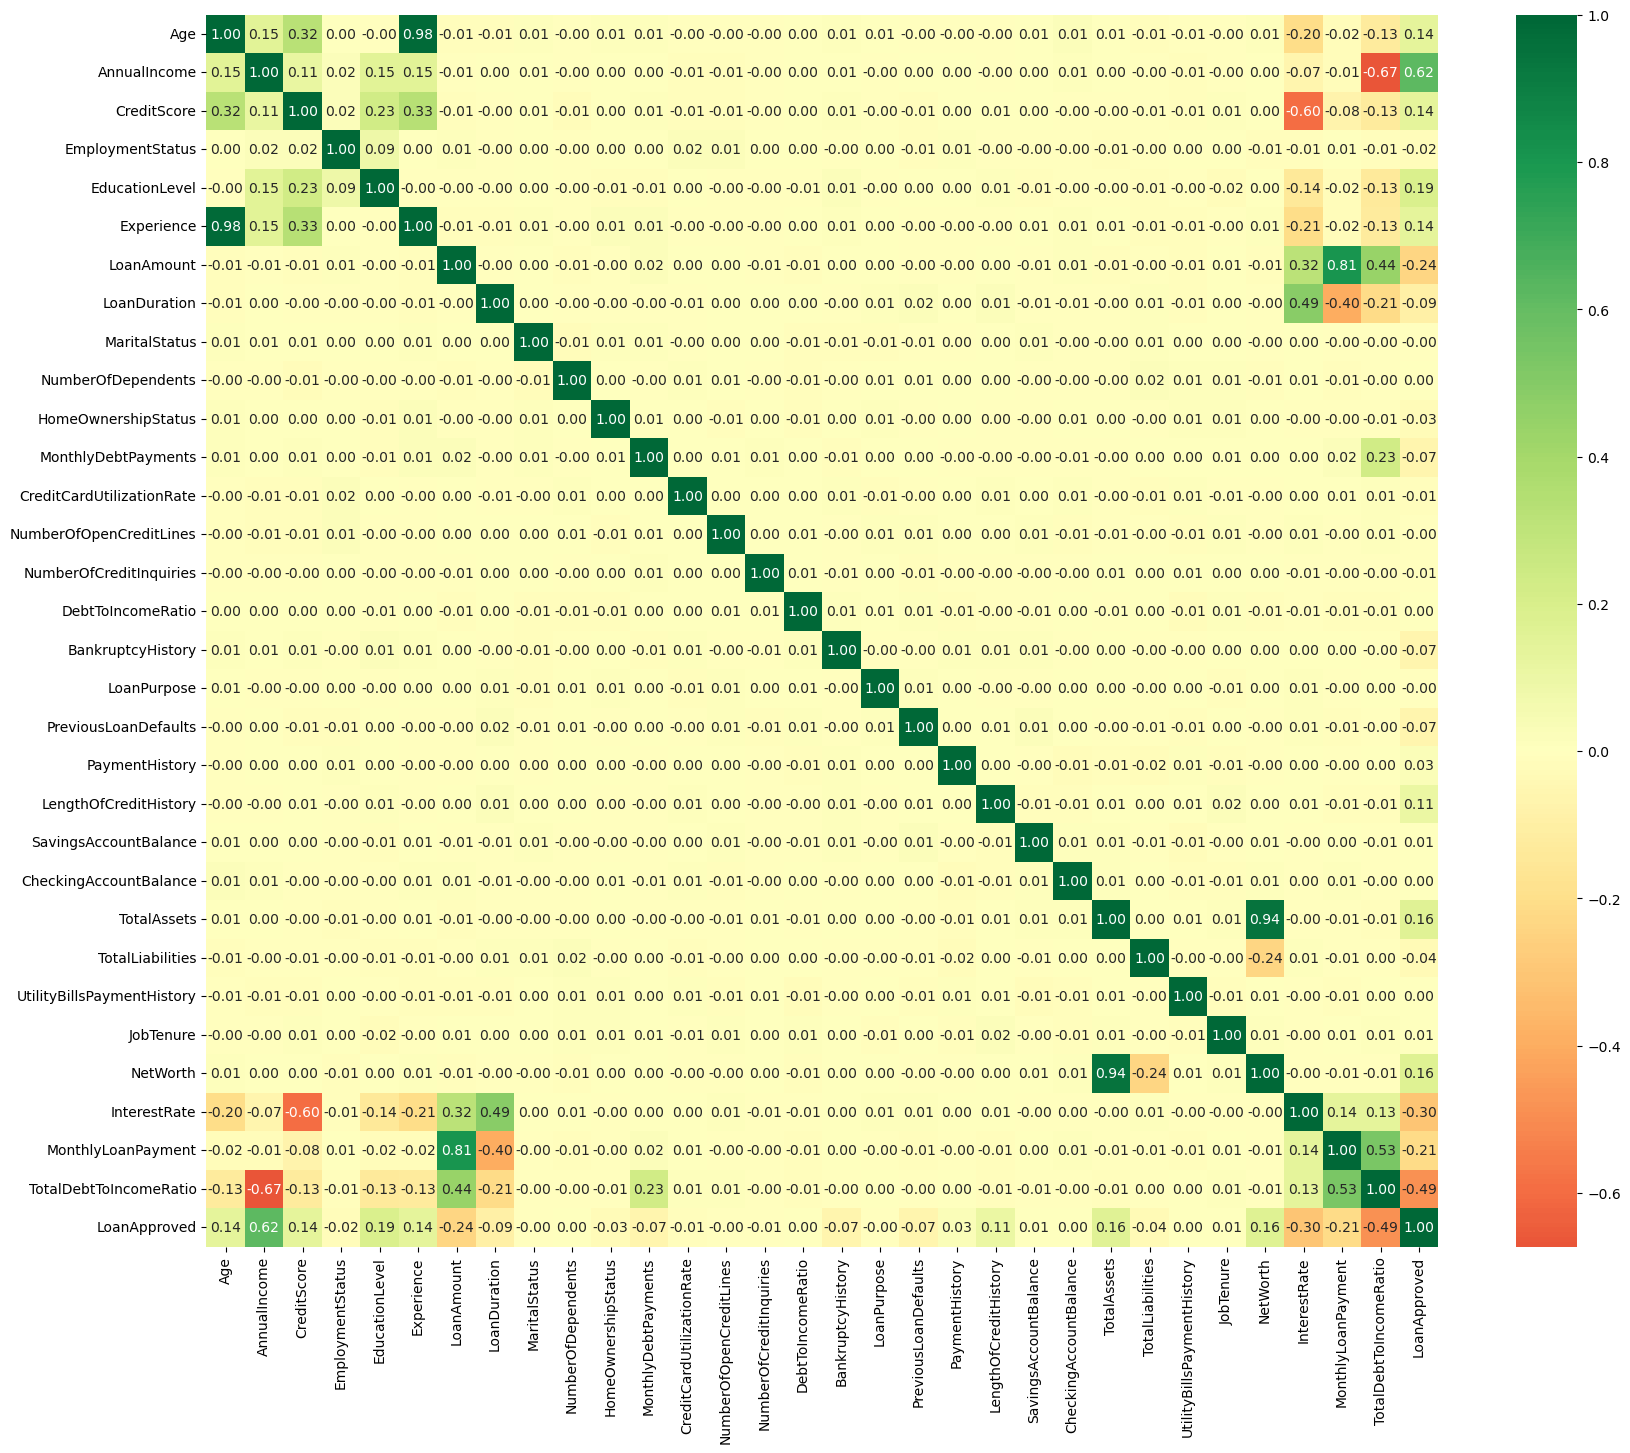

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 16))
# Plot the correlation matrix as a heatmap
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', center=0, square=True, fmt = ".2f")

In [32]:
# Calculate correlations for all features with the target variables
correlation_with_approval = df.corr()['LoanApproved'].sort_values(ascending=False)
print(correlation_with_approval)
# Define thresholds for feature selection (absolute correlation > 0.01)
threshold = 0.01
suitable_features_for_approval = correlation_with_approval[correlation_with_approval.abs() > threshold].index.tolist()

# Remove target variables from the lists
suitable_features_for_approval.remove('LoanApproved')

print(f"Suitable Features for Binary classification Analysis:\n {suitable_features_for_approval}")

LoanApproved                  1.000000
AnnualIncome                  0.619569
EducationLevel                0.194434
NetWorth                      0.164110
TotalAssets                   0.157450
CreditScore                   0.142000
Age                           0.141029
Experience                    0.141021
LengthOfCreditHistory         0.105949
PaymentHistory                0.029722
SavingsAccountBalance         0.005537
JobTenure                     0.005064
CheckingAccountBalance        0.004883
UtilityBillsPaymentHistory    0.003272
NumberOfDependents            0.001717
DebtToIncomeRatio             0.000219
LoanPurpose                  -0.001415
MaritalStatus                -0.002144
NumberOfOpenCreditLines      -0.004548
NumberOfCreditInquiries      -0.006205
CreditCardUtilizationRate    -0.010340
EmploymentStatus             -0.020411
HomeOwnershipStatus          -0.032119
TotalLiabilities             -0.036273
PreviousLoanDefaults         -0.065343
BankruptcyHistory        

# Train-Test-Split using Random Forest to predict Loan Approval

In [34]:
X = df[['AnnualIncome', 'EducationLevel', 'TotalAssets', 'Age', 'Experience', 'EmploymentStatus', 'HomeOwnershipStatus', 'TotalLiabilities', 'PreviousLoanDefaults', 'BankruptcyHistory', 'LoanDuration', 'MonthlyLoanPayment', 'LoanAmount', 'InterestRate', 'TotalDebtToIncomeRatio']]
y = df['LoanApproved']

<Axes: xlabel='LoanApproved', ylabel='count'>

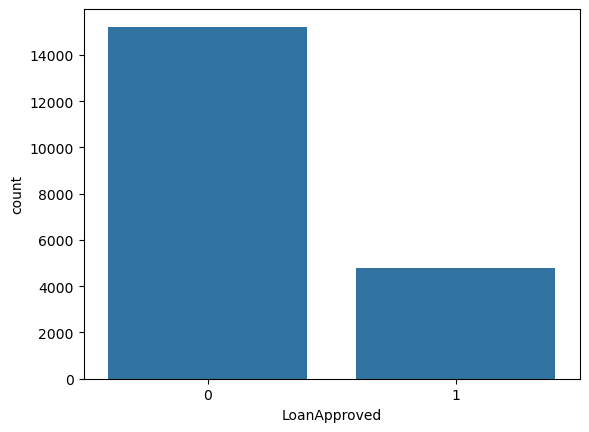

In [35]:
sns.countplot(x = 'LoanApproved', data = df)

In [36]:
df['LoanApproved'].value_counts()

LoanApproved
0    15220
1     4780
Name: count, dtype: int64

The Data is imbalanced

A dataset is considered imbalanced if one class makes up more than 70-80% of the total data, which is the case here

Let's make it balanced

In [38]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 0.7, random_state = 42)
X, y = smote.fit_resample(X, y)

In [39]:
y.value_counts()

LoanApproved
0    15220
1    10654
Name: count, dtype: int64

<Axes: xlabel='LoanApproved', ylabel='count'>

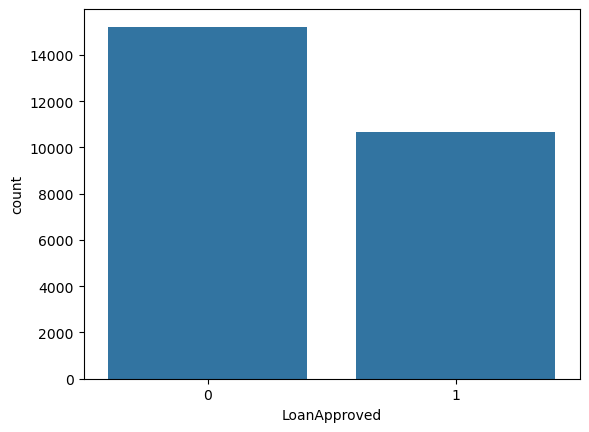

In [40]:
sns.countplot(x = y, data = df)

In [41]:
# Split into training, validation and testing sets
# 1. Spliting into train and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# 2. Split the training set further into train(80%) and validation(10%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train.shape, X_test.shape, X_val.shape

((20699, 15), (2588, 15), (2587, 15))

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [44]:
# Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100)

In [45]:
# Training the model on the training data
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
# Making predictions on the test data
y_pred = random_forest.predict(X_train)
y_pred_val = random_forest.predict(X_val)
y_pred_test = random_forest.predict(X_test)

In [47]:
rf_accuracy = accuracy_score(y_train, y_pred)
print("Train Accuracy:", rf_accuracy)

Train Accuracy: 1.0


In [48]:
rf_accuracy = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", rf_accuracy)

Validation Accuracy: 0.9435639737147274


In [49]:
rf_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", rf_accuracy)

Test Accuracy: 0.9443585780525502


# Support Vector Machine

In [51]:
# Split into training, validation and testing sets
# 1. Spliting into train and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# 2. Split the training set further into train(80%) and validation(10%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train.shape, X_test.shape, X_val.shape

((20699, 15), (2588, 15), (2587, 15))

In [53]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [54]:
# Support Vector Machine
from sklearn.svm import SVC
clf = SVC(kernel = 'rbf')

In [55]:
clf.fit(X_train, y_train)

SVC()

In [56]:
# Making predictions
y_pred = clf.predict(X_train)
y_pred_val = clf.predict(X_val)
y_pred_test = clf.predict(X_test)

In [57]:
svm_accuracy = accuracy_score(y_train, y_pred)
print("Train Accuracy:", rf_accuracy)

Train Accuracy: 0.9443585780525502


In [58]:
svm_accuracy = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", rf_accuracy)

Validation Accuracy: 0.9443585780525502


In [59]:
svm_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", rf_accuracy)

Test Accuracy: 0.9443585780525502


# Artificial Neural Network

In [61]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [62]:
# Split into training, validation and testing sets
# 1. Spliting into train and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
# 2. Split the training set further into train(80%) and validation(10%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train.shape, X_test.shape, X_val.shape

((20699, 15), (2588, 15), (2587, 15))

In [64]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [65]:
# Initialising ANN
ann = Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


In [66]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [67]:
epochs = 25
history = ann.fit(X_train, y_train, epochs = epochs, batch_size = 32, validation_data=(X_val, y_val), verbose = 1)

Epoch 1/25
647/647 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8763 - loss: 0.2975 - val_accuracy: 0.9320 - val_loss: 0.1729
Epoch 2/25
647/647 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9330 - loss: 0.1582 - val_accuracy: 0.9273 - val_loss: 0.1685
Epoch 3/25
647/647 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9334 - loss: 0.1571 - val_accuracy: 0.9412 - val_loss: 0.1598
Epoch 4/25
647/647 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9345 - loss: 0.1575 - val_accuracy: 0.9335 - val_loss: 0.1586
Epoch 5/25
647/647 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9392 - loss: 0.1504 - val_accuracy: 0.9320 - val_loss: 0.1598
Epoch 6/25
647/647 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9398 - loss: 0.1474 - val_accuracy: 0.9405 - val_loss: 0.1582
Epoch 7/25
647/647 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9357 - loss: 0.1501 - val_accuracy: 0.9235 - val_loss: 0.1695
Epoch 8/25
647/647 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9404 - loss: 0.1406 - val_accuracy: 0.

In [68]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,949 (42.77 KB)

 Trainable params: 3,649 (14.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,300 (28.52 KB)

In [69]:
test_loss, test_acc = ann.evaluate(X_test, y_test, verbose = 0)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.9347


# Explainable AI (SHAP)

In [71]:
import shap
shap.initjs()

In [72]:
# Since rf is our trained Random Forest model
explainer = shap.Explainer(random_forest) # Use training data for initialization

# Compute SHAP values for the test set
shap_values = explainer(X[0:1000], check_additivity=False)

In [73]:
print(type(shap_values))

<class 'shap._explanation.Explanation'>


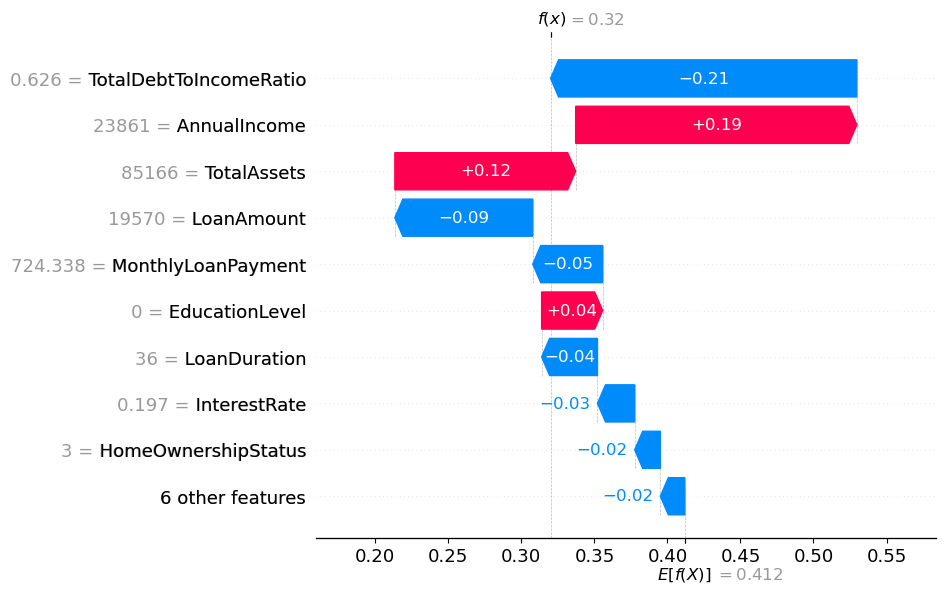

In [74]:
shap.plots.waterfall(shap.Explanation(
    values=shap_values.values[30, :, 1],  # Select features for output 1
    base_values=shap_values.base_values[30, 1],  # Base value for output 1
    data=shap_values.data[30],  # Input data for instance 30
    feature_names=shap_values.feature_names
))

#### Feature Contributions to Prediction for Loan Approved
The SHAP waterfall plot shows how each feature contributes to the model's final prediction.
#### Key insights:
1. TotalDebtToIncomeRatio (0.626) positively contributes (+0.21).
2. AnnualIncome (23861) negatively contributes (-0.21).
3. TotalAssets (85166) negatively contributes (-0.15).
4. LoanAmount (19570) positively contributes (+0.09).
   
Other features like EducationLevel, MonthlyLoanPayment, and HomeOwnershipStatus have smaller impacts.

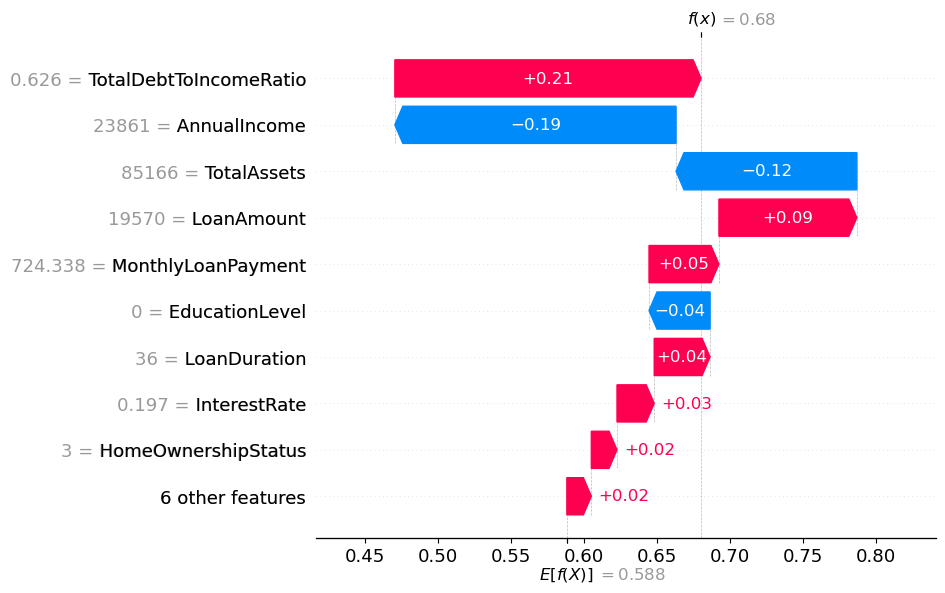

In [76]:
shap.plots.waterfall(shap.Explanation(
    values=shap_values.values[30, :, 0],  # Select features for output 0
    base_values=shap_values.base_values[30, 0],  # Base value for output 0
    data=shap_values.data[30],  # Input data for instance 30
    feature_names=shap_values.feature_names
))

#### Feature Contributions to Prediction for Loan Approved
The SHAP waterfall plot shows how each feature contributes to the model's final prediction.
#### Key insights:
1. TotalDebtToIncomeRatio (0.626) positively contributes (+0.21).
2. AnnualIncome (23861) negatively contributes (-0.21).
3. TotalAssets (85166) negatively contributes (-0.15).
4. LoanAmount (19570) positively contributes (+0.09).
   
Other features like EducationLevel, MonthlyLoanPayment, and HomeOwnershipStatus have smaller impacts.

# Save the Model

In [78]:
# import joblib

# joblib.dump(random_forest, 'loan_approval_model.pkl')
# joblib.dump(scaler, 'Scaler.pkl')